In [128]:
# # remote M11
# feat = "/media/cristianromero/ROMERODRIVE/0ptimus/Datasets/kantar_11_features.csv"
# targ = "/media/cristianromero/ROMERODRIVE/0ptimus/Datasets/kantar_11_targets.csv"


# office M11
targ = '/home/cristianromero/Documents/Datasets/kantar_11_targets.csv'
feat = '/home/cristianromero/Documents/Datasets/kantar_11_features.csv'

# office M6
# feat = '/home/cristianromero/Documents/Datasets/kantar_6_targets.csv'
# targ = '/home/cristianromero/Documents/Datasets/kantar_6_features.csv'

In [129]:
import pandas as pd
# import data which was subset using R
df_y6= pd.read_csv(targ)
df_x6= pd.read_csv(feat)

# remove extra id columns (relic of exporting data from R)
df_y6=df_y6.iloc[:,1]
df_x6=df_x6.iloc[:,1:len(df_x6)]

In [130]:
start=feat_treat(df_x6,df_y6,42)

categorical column indices:  [1, 2, 4, 5, 27, 70, 86, 162, 164, 165, 166, 167, 172, 173] 
 
 Class  Count
     0   7739
     1   1191 
 
Base rate:  0.1333706606942889


In [131]:
start.check_na()

                                    column_name  percent_na
10          hh_pcnt_pop_professional_occupation    0.011198
5           hh_median_rent_as_pcnt_of_hh_income    0.022396
11                              hh_pcnt_poverty    0.022396
12                        hh_pcnt_self_employed    0.022396
2                 hh_average_worker_travel_time    0.111982
14                           hh_pcnt_unemployed    0.212766
8                     hh_pcnt_housing_300k_plus    0.268757
15                 hh_pcnt_workers_work_at_home    0.492721
6                                    hh_ownrent    0.683091
9              hh_pcnt_income_public_assistance    1.041433
7                   hh_pcnt_hh_income_150k_plus    1.276596
13  hh_pcnt_total_work_16_plus_use_public_trans    2.799552
17                           hh_vehicles_per_hh    2.922732
0                                           age    3.840985
1                          hh_actual_hom_evalue   11.534155
4                       hh_home_equity_e

In [132]:
# impute & encode
start.check_na(50)
start.handle_na('remove',start.na_col)
start.check_na()
start.handle_na('random',start.na_col)
start.check_na()
start.encode()

                 column_name  percent_na
1  ind_number_of_trade_lines   78.230683
0             hh_boat_length   95.319149 
 
                                    column_name  percent_na
9           hh_pcnt_pop_professional_occupation    0.011198
4           hh_median_rent_as_pcnt_of_hh_income    0.022396
10                              hh_pcnt_poverty    0.022396
11                        hh_pcnt_self_employed    0.022396
2                 hh_average_worker_travel_time    0.111982
13                           hh_pcnt_unemployed    0.212766
7                     hh_pcnt_housing_300k_plus    0.268757
14                 hh_pcnt_workers_work_at_home    0.492721
5                                    hh_ownrent    0.683091
8              hh_pcnt_income_public_assistance    1.041433
6                   hh_pcnt_hh_income_150k_plus    1.276596
12  hh_pcnt_total_work_16_plus_use_public_trans    2.799552
16                           hh_vehicles_per_hh    2.922732
0                                 

In [133]:
# create copies of prepped data set
import copy
rf_pca=copy.deepcopy(start)
rf_svd=copy.deepcopy(start)
rf_rfe=copy.deepcopy(start)
rf_rfe_pca=copy.deepcopy(start)
rf_rfe_svd=copy.deepcopy(start)


In [134]:
# perform 
rf_pca.pca(24)

rf_svd.svd(22)

rf_rfe.rfe(n=40)

rf_rfe_pca.rfe(n=40)
rf_rfe_pca.pca(8)

rf_rfe_svd.rfe(n=40)
rf_rfe_svd.svd(8)

In [135]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier

In [136]:
iterations=400

Estimator:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Sampling technique:  None 
 
Tuning...
Best: 0.5697959099857987 using {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 16, 'max_features': 0.02715450533886874, 'min_samples_leaf': 0.0885384087530076, 'min_samples_split': 0.631146839630611, 'n_estimators': 450, 'n_jobs': -1, 'random_state': 42} 

Fitting model...
Accuracy:           0.5727883538633819
Precision:          0.1724137931034483
Recall:             0.54
Specificity:        0.57812
Neg Pred Val:       0.88534
Confusion Sum:      2.175873793103448
 
F1 score:           0.26137463697967084
F2 score:           0.37858
F3 score:           0.69948
Cohen kappa score:  0.06241752314168192
 
Brier score loss:   0.42721164613661816
MCC:                0.08259924661672714
AUC:                0.5590625 
  
  
  
  
 
Sampling technique:  Random under sampling 
 
Tuning...
Best: 0.5633340583088474 using {'bootstrap': True, 'c

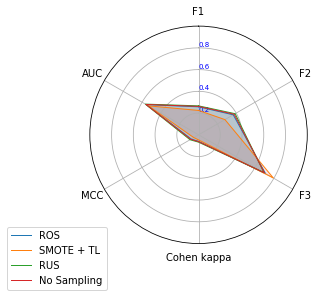

In [137]:
from timeit import default_timer as timer
start = timer()
rf_pca.sample_tune_test(model=model, tuning_iter=iterations, tuning_strategy="randomized")
end=timer()
print("Seconds elapsed: ",(end - start), "per ",iterations," iterations")
print("Minutes elapsed: ",(end - start)/60, "per ",iterations," iterations")
print("Run Time: ", iterations/((end - start)/60), " iter/min")

Estimator:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Sampling technique:  None 
 
Tuning...
Best: 0.5785530808390495 using {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 21, 'max_features': 0.3301893336342497, 'min_samples_leaf': 0.0632217438010134, 'min_samples_split': 0.17908158439480998, 'n_estimators': 450, 'n_jobs': -1, 'random_state': 42} 

Fitting model...
Accuracy:           0.5582306830907054
Precision:          0.17412333736396615
Recall:             0.576
Specificity:        0.55534
Neg Pred Val:       0.88947
Confusion Sum:      2.194933337363966
 
F1 score:           0.26740947075208915
F2 score:           0.39409
F3 score:           0.68377
Cohen kappa score:  0.0667990267691464
 
Brier score loss:   0.4417693169092945
MCC:                0.09138938263989324
AUC:                0.5656692708333334 
  
  
  
  
 
Sampling technique:  Random under sampling 
 
Tuning...
Best: 0.5895895819104493 using {'bootstrap': False, '

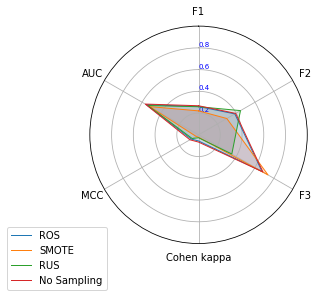

In [138]:
from timeit import default_timer as timer
start = timer()
rf_svd.sample_tune_test(model=model, tuning_iter=iterations, tuning_strategy="randomized")
end=timer()
print("Seconds elapsed: ",(end - start), "per ",iterations," iterations")
print("Minutes elapsed: ",(end - start)/60, "per ",iterations," iterations")
print("Run Time: ", iterations/((end - start)/60), " iter/min")

Estimator:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Sampling technique:  None 
 
Tuning...
Best: 0.584450775899201 using {'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 36, 'max_features': 0.5207316330051716, 'min_samples_leaf': 0.13058453117040622, 'min_samples_split': 0.49794640573863824, 'n_estimators': 350, 'n_jobs': -1, 'random_state': 42} 

Fitting model...
Accuracy:           0.5128779395296752
Precision:          0.1736842105263158
Recall:             0.66
Specificity:        0.48893
Neg Pred Val:       0.89833
Confusion Sum:      2.2209442105263157
 
F1 score:           0.275
F2 score:           0.42308
F3 score:           0.63322
Cohen kappa score:  0.06856492027334848
 
Brier score loss:   0.48712206047032475
MCC:                0.10355940415719829
AUC:                0.5744661458333333 
  
  
  
  
 
Sampling technique:  Random under sampling 
 
Tuning...
Best: 0.5814768696322952 using {'bootstrap': False, 'cl

/home/cristianromero/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.839592426939024 using {'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 27, 'max_features': 0.5334359334632711, 'min_samples_leaf': 0.02208081926213871, 'min_samples_split': 0.5026139913012321, 'n_estimators': 450, 'n_jobs': -1, 'random_state': 42} 

Fitting model...
Accuracy:           0.6142217245240762
Precision:          0.13957307060755336
Recall:             0.34
Specificity:        0.65885
Neg Pred Val:       0.85981
Confusion Sum:      1.9982330706075535
 
F1 score:           0.1979045401629802
F2 score:           0.26414
F3 score:           0.74603
Cohen kappa score:  -0.0007156368273215641
 
Brier score loss:   0.38577827547592386
MCC:                -0.0008386682202598127
AUC:                0.4994270833333334 
  
  
  
  
 
[0.28598, 0.41919, 0.69749, 0.09145, 0.12378, 0.58883]
Seconds elapsed:  5600.173029138001 per  400  iterations
Minutes elapsed:  93.33621715230001 per  400  iterations
Run Time:  4.2855818695470145  iter/min


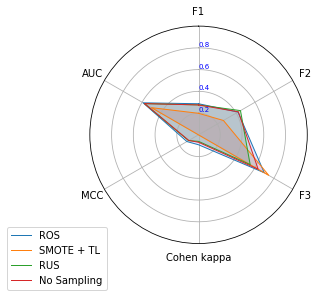

In [139]:
from timeit import default_timer as timer
start = timer()
rf_rfe.sample_tune_test(model=model, tuning_iter=iterations, tuning_strategy="randomized")
end=timer()
print("Seconds elapsed: ",(end - start), "per ",iterations," iterations")
print("Minutes elapsed: ",(end - start)/60, "per ",iterations," iterations")
print("Run Time: ", iterations/((end - start)/60), " iter/min")

Estimator:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Sampling technique:  None 
 
Tuning...
Best: 0.5726911635240426 using {'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.12924611090575233, 'min_samples_leaf': 0.15460811266735205, 'min_samples_split': 0.574176062918201, 'n_estimators': 450, 'n_jobs': -1, 'random_state': 42} 

Fitting model...
Accuracy:           0.5436730123180291
Precision:          0.16004813477737664
Recall:             0.532
Specificity:        0.54557
Neg Pred Val:       0.87749
Confusion Sum:      2.1151081347773766
 
F1 score:           0.24606845513413503
F2 score:           0.36319
F3 score:           0.67282
Cohen kappa score:  0.039319784102864075
 
Brier score loss:   0.4563269876819709
MCC:                0.05396019808860802
AUC:                0.5387864583333334 
  
  
  
  
 
Sampling technique:  Random under sampling 
 
Tuning...
Best: 0.5698003822989691 using {'bootstrap'

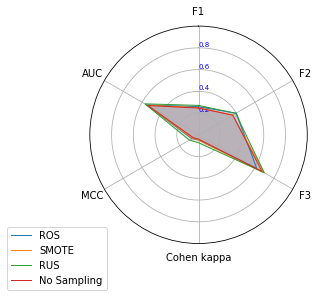

In [140]:
from timeit import default_timer as timer
start = timer()
rf_rfe_pca.sample_tune_test(model=model, tuning_iter=iterations, tuning_strategy="randomized")
end=timer()
print("Seconds elapsed: ",(end - start), "per ",iterations," iterations")
print("Minutes elapsed: ",(end - start)/60, "per ",iterations," iterations")

Estimator:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Sampling technique:  None 
 
Tuning...
Best: 0.5751335237717881 using {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.10054282795107923, 'min_samples_leaf': 0.11633505883669479, 'min_samples_split': 0.2365768868692023, 'n_estimators': 450, 'n_jobs': -1, 'random_state': 42} 

Fitting model...
Accuracy:           0.583986562150056
Precision:          0.17001338688085676
Recall:             0.508
Specificity:        0.59635
Neg Pred Val:       0.88162
Confusion Sum:      2.1559833868808567
 
F1 score:           0.25476429287863595
F2 score:           0.36348
F3 score:           0.71145
Cohen kappa score:  0.05695516159705272
 
Brier score loss:   0.416013437849944
MCC:                0.07340190508488802
AUC:                0.5521770833333334 
  
  
  
  
 
Sampling technique:  Random under sampling 
 
Tuning...
Best: 0.5778910073486916 using {'bootstrap': T

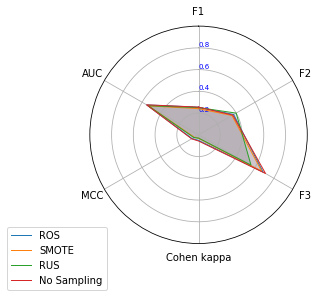

In [141]:
from timeit import default_timer as timer
start = timer()
rf_rfe_svd.sample_tune_test(model=model, tuning_iter=iterations, tuning_strategy="randomized")
end=timer()
print("Seconds elapsed: ",(end - start), "per ",iterations," iterations")
print("Minutes elapsed: ",(end - start)/60, "per ",iterations," iterations")
print("Run Time: ", iterations/((end - start)/60), " iter/min")

In [142]:
with open('/home/cristianromero/Documents/M6_M11_results/rf_results.csv', 'w') as f:
     pd.concat([rf_pca.metrics, rf_svd.metrics, rf_rfe.metrics, rf_rfe_pca.metrics, rf_rfe_svd.metrics], axis=1).to_csv(f)

In [145]:
# Feature treatment class
# Use to optimize feature selection, sampling, and hyperparameter tuning for model testing
# Stream-lines testing process and brings together packages like scikit-learn, skopt, pandas, numpy 
# create instances of feature treatments 
# returns performance metrics for treatments with visual

# Run Time: 
# RandomForestClassifier = 4.5 iterations/min
# XGBClassifier = 5.2 iterations/min

# required arguments: 
# X = feature pandas dataframe long format
# y = dependent variable pandas dataframe long format
# random_state = seed for pseudo random number generator to be used throughout treatments

# main dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import floor, ceil, pi
# scikit tools
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score,accuracy_score,roc_auc_score,brier_score_loss,confusion_matrix,f1_score,recall_score,precision_score,matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
# sampling tools
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

class feat_treat:
    def __init__(self,X,y,random_state):
        self.X=X
        self.y=y
        self.random_state=random_state
        self.encoded=False
        self.na_col='update with check_na(percent_threshold)'
        self.metrics='No metrics available'
        self.model="No model available"
        
        # Low variance filter 
        # check variance of each column
        # remove column if variance is less than var_threshold
        drop=[]
        var_threshold = 0.004975
        for col in self.X.columns:
            if self.X[col].dtype!='object': 
                if np.var(self.X[col]) < var_threshold:
                    drop.append(col)
        self.X=self.X.drop(columns=drop)
        
        # GET TO KNOW YOUR DATA SET
        # return dataframe indices for categorical datatypes
        cat_col=[self.X.columns.get_loc(i) for i in self.X.columns if self.X[i].dtype == 'object']
        print("categorical column indices: ",cat_col,"\n ")
    
        # return base rate
        unique_elements, counts_elements = np.unique(y, return_counts=True)
        DV_classes_df = pd.DataFrame({'Class': unique_elements,
                                      'Count': counts_elements})
        print(DV_classes_df.to_string(index=False),"\n ")
        print("Base rate: ",counts_elements[1]/sum(counts_elements))
    

    def check_na(self,percent_threshold=0):
        # check for missing values  
        percent_missing = self.X.isnull().sum() * 100 / len(self.X)
        column_name = [percent_missing.index[i] for i in range(0,len(self.X.columns)) if percent_missing[i]>percent_threshold]
        percent_na = [percent_missing[i] for i in range(0,len(self.X.columns)) if percent_missing[i]>percent_threshold]
        missing_value_df = pd.DataFrame({'column_name': column_name,
                                         'percent_na': percent_na})
        missing_value_df.sort_values('percent_na', inplace=True)
        print(missing_value_df, "\n ")
        self.na_col=column_name
    
    
    
    def handle_na(self,strategy,columns):
        # handle missing values
        # methods: mean, median, mode, value, remove

        if isinstance(strategy,int)==True or isinstance(strategy,float)==True:
            for i in columns:
                self.X[i]=self.X[i].fillna(strategy)
        else:
            strategy1=''.join(strategy.split()).lower()
            if strategy1=='mean':
                for i in columns:
                    mean=self.X[i].mean()
                    self.X[i].fillna(mean,inplace=True)
            elif strategy1=='median':
                for i in columns:
                    median=self.X[i].median()
                    self.X[i].fillna(median,inplace=True)                            
            elif strategy1=='mode':
                for i in columns:
                    mode = self.X[i].mode()[0]
                    self.X[i].fillna(mode,inplace=True)                      
            elif strategy1=='remove':
                self.X.drop(columns=self.na_col,inplace=True) 
            elif strategy1=='random':
                for i in columns:
                    uniques = np.unique(self.X[i])
                    uniques = uniques[~np.isnan(uniques)]
                    for j in range(0,len(self.X[i])):
                        if np.isnan(self.X.loc[self.X.index[j],i])==True:
                            self.X.loc[self.X.index[j],i] = np.random.choice(uniques)
#             elif strategy1=='mice': # mice will perform impute on all columns
#                 from impyute.imputation.cs import mice
#                 col=self.X.columns
#                 X_imp=mice(self.X)
#                 self.X=pd.DataFrame(X_imp, columns=col)
            else:
                for i in columns:
                    self.X[i].fillna(strategy,inplace=True)                 
         
    
    
    def pcc_filter(self,k):
        if isinstance(k,int)==True or isinstance(k,float)==True:
            # check pearson coefficient for linear correlation between DV and each feature 
            # remove column if PCC is less than correlation limit
  
            df=pd.concat([self.y, self.X], axis=1, ignore_index=True)
#           create pearson correlation coefficient matrix
            cor = df.corr()
            corr_limit=k
            cor_target = abs(cor.iloc[:,0])
            relevant_features = cor_target[cor_target>corr_limit]
            relevant_features=relevant_features.iloc[1:]
            rel_col =[]
            for i in relevant_features.index:
                rel_col.append(i-1) 
#           drop all columns except relevant ones
            self.X=self.X.iloc[:,rel_col]
#           check which columns are kept 
            keep_col=self.X.columns
            print(keep_col)
            print(len(keep_col))            
#       section to include pcc optimization loop
        else:
            k = ''.join(k.split()).lower()
            k = k[:3]
            if k == 'opt':
                pass

    
    
    def collinear(self,k):
#       check pearson coefficient for linear correlation between features (collinearity)
#       remove if PCC is greater than collinear limit
#       recreate pearson correlation matrix
        cor = self.X.corr()
        feat_targets=[]
        feat_remove=[]
        ignore=[]
#       set correlation limit
        colinear_corr_limit=k
#       check for collinearity
        for i in self.X.columns:
            cor_target = abs(cor.loc[:,i])
            feat_targets.append((i,cor_target[cor_target>colinear_corr_limit]))  
        # remove collinear features
        for i in feat_targets:
            ignore.append(i[0])
            for j in i[1].index:
                if j not in ignore:
                    feat_remove.append(j)

        feat_remove=set(feat_remove)
        self.X=self.X.drop(columns=feat_remove)
        # check which columns are kept 
        keep_col=self.X.columns
        print("columns remaining: ",keep_col)
        print(len(keep_col), " columns")
                      
    
    def encode(self, strategy=None):
        if(strategy=='dummy'):
            self.X=pd.get_dummies(self.X)
            self.encoded=True    
        else:
            cat_col=[i for i in self.X.columns if self.X[i].dtype == 'object']
            if len(cat_col)>0:
                le = preprocessing.LabelEncoder()
                for col in cat_col:
                    self.X[col]=le.fit_transform(self.X[col])            
                self.encoded=True
            else:
                print("No categorical variables in data set")
        

    def rfe(self,n=None,cum=None,rfe_model=None):
        if isinstance(n,int)==True and cum==None:
            if rfe_model==None:
                from sklearn.linear_model import LogisticRegression
                rfe_model=LogisticRegression(solver='lbfgs')
                kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)
                selector = RFECV(estimator=rfe_model, min_features_to_select = n, cv=kfold, n_jobs=-1).fit(self.X,self.y)
                keep = [i for i in range(0,len(selector.support_)) if selector.support_[i]==True]
                self.X=self.X.iloc[:,keep]
            else:
                kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)
                selector = RFECV(estimator=rfe_model, min_features_to_select = n, cv=kfold, n_jobs=-1).fit(self.X,self.y)
                keep = [i for i in range(0,len(selector.support_)) if selector.support_[i]==True]
                self.X=self.iloc[:,keep]
        elif isinstance(cum,float)==True and n==None:
            # cumulative feature importance
            pass
#       section to include optimization loop
        else:
            n = ''.join(n.split()).lower()
            n = n[:3]
            if n == 'opt':
                pass                

            

    def skb(self,k,score_func=None):
        cat_col=[self.X.columns.get_loc(i) for i in self.X.columns if self.X[i].dtype == 'object']
        if self.encoded == True or len(cat_col)==0:
            if isinstance(k,int)==True or isinstance(k,float)==True:
                if score_func==None:
                    from sklearn.feature_selection import chi2
                    skb =SelectKBest(score_func=chi2, k=k).fit(self.X,self.y)
                    self.X = self.X.iloc[:,skb.get_support(indices=True)]
                else:
                    from sklearn.feature_selection import score_func
                    skb = SelectKBest(score_func=score_func, k=k).fit(self.X,self.y)
                    self.X = self.X.iloc[:,skb.get_support(indices=True)]
#           section to include optimization loop
            else:
                n = ''.join(k.split()).lower()
                n = n[:3]
                if n == 'opt':
                    pass              
        else:
            print('Please encode feature set first')
            
            
            
    def svd(self,n=None, var=None):
        if var==None and isinstance(n,int)==True:
            col = self.X.columns
            svd = TruncatedSVD(n_components=n, n_iter=5, random_state=self.random_state).fit(self.X)
            self.X = pd.DataFrame(svd.transform(self.X), columns=['SV %i' % i for i in range(n)], index=self.X.index)
        elif n==None and isinstance(var,float)==True:
            n=len(self.X.columns)
            exp_var = 0
            svd = TruncatedSVD(n_components=n, n_iter=5, random_state=self.random_state).fit(self.X) 
            j=0
            exp_var=0
            while exp_var<var and j<n:
                exp_var = exp_var + svd.explained_variance_ratio_[j]
                j=j+1
            svd = TruncatedSVD(n_components=j, n_iter=5, random_state=self.random_state).fit(self.X) 
            self.X = pd.DataFrame(svd.transform(self.X), columns=['SV %i' % i for i in range(n)], index=self.X.index)
#       section to include optimization loop
        else:
            n = ''.join(n.split()).lower()
            n = n[:3]
            if n == 'opt':
                pass             
            

            
    def pca(self,n=None,var=None):
        if var==None and isinstance(n,int)==True:
            pca = PCA(n_components=n, random_state=self.random_state).fit(self.X) 
            self.X = pd.DataFrame(pca.transform(self.X), columns=['PCA %i' % i for i in range(n)], index=self.X.index) 
        elif n==None and isinstance(var,float)==True:
            n=len(self.X.columns)
            exp_var = 0
            pca = PCA(n_components=n, random_state=self.random_state).fit(self.X) 
            j=0
            exp_var=0
            while exp_var<var and j<n:
                exp_var = exp_var + pca.explained_variance_ratio_[j]
                j=j+1
            pca = PCA(n_components=j, random_state=self.random_state).fit(self.X) 
            self.X = pd.DataFrame(pca.transform(self.X), columns=['PCA %i' % i for i in range(n)], index=self.X.index) 
#       section to include optimization loop
        else:
            n = ''.join(n.split()).lower()
            n = n[:3]
            if n == 'opt':
                pass             

    
#   def sample(strategy):
    def sample_tune_test(self,model,tuning_iter,tuning_strategy='randomized',tuning_metric='roc_auc',test_size=0.2):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=self.random_state)
#       function to automatically sample, HP tune, then test with best parameters
        col = X_train.columns
        
        rus = RandomUnderSampler()
        X_rus, y_rus = rus.fit_sample(X_train, y_train)
        X_rus = pd.DataFrame(X_rus, columns = col)

        ros = RandomOverSampler()
        X_ros, y_ros = ros.fit_sample(X_train, y_train)
        X_ros = pd.DataFrame(X_ros, columns = col)
        
        smote = SMOTE(ratio='minority')
        X_sm, y_sm = smote.fit_sample(X_train, y_train)
        X_sm = pd.DataFrame(X_sm, columns = col)

        smt = SMOTETomek(ratio='auto')
        X_smt, y_smt = smt.fit_sample(X_train, y_train)
        X_smt = pd.DataFrame(X_smt, columns = col)
        
        samples = ((X_train,y_train,"None"),
                  (X_rus,y_rus,"Random under sampling"),
                  (X_ros,y_ros,"Random over sampling"),
                  (X_sm,y_sm,"SMOTE"),
                  (X_smt,y_smt,"SMOTE + TL")) 
        N = len(samples)
#       tune and test
        best_param=[0]*N
        self.metrics=pd.DataFrame(columns=["Sampling",
                                           "Accuracy",
                                           'Precision',
                                           'Recall',
                                           'Specificity',
                                           'Neg Pred Val',
                                           'Confusion Sum',
                                           'F1 score', 
                                           'F2 score',
                                           'F3 score',
                                           'Cohen kappa score',
#                                              "RMSE" : rmse,
#                                              "Jaccard score" : jaccard,
                                           "Brier score loss",
                                           'MCC',
                                           "AUC"])
        radar_df = pd.DataFrame(columns=['Sampling',
                                            'F1', 
                                            'F2',
                                            'F3',
                                            'Cohen kappa',
                                            'MCC',
                                            'AUC'])
        model_rep=model
        print("Estimator: ",model_rep)
        
        for i in range(0,N):
            model_inst=model_rep()
            print("Sampling technique: ",samples[i][2], "\n ")
#           IMPORTANT when inputting default hyperparameters:
#           wrap non int or float types with Categorical() function
#           NEVER input int or float types with only one parameter option... this will not work with bayes search (works fine with randomized search)
            if("RandomForest" in str(model_rep)):
                tree_ensemble=True
#               default hyperparameter testing range
                bootstrap = Categorical([True, False])
                n_estimators = [350,450]
                criterion= Categorical(['gini','entropy'])
                max_depth =np.arange(1,floor(len(X_train.columns)),1)
                max_features = np.random.uniform(0.01,1,10000)
                min_samples_split = np.random.uniform(0.01,1,10000)
                min_samples_leaf = np.random.uniform(0.0001,0.5,10000)
                class_weight = Categorical(['balanced','balanced_subsample',None])
                n_jobs = [-1]
                random_state = [self.random_state]
#               input hyperparameters into dictionary
                param_grid = dict(n_estimators=n_estimators,
                                  bootstrap=bootstrap, 
                                  criterion=criterion,
                                  min_samples_leaf=min_samples_leaf, 
                                  min_samples_split=min_samples_split,
                                  max_features=max_features,
                                  max_depth=max_depth,
                                  class_weight=class_weight,
                                  n_jobs=n_jobs,
                                  random_state=random_state)

            elif("XGB" in str(model_rep)):
                tree_ensemble=True
    #               default hyperparameter testing range
                booster = Categorical(['gbtree','gblinear','dart'])
                n_estimators = [350,450]
                learning_rate = np.random.uniform(0.000001,1,10000)
                max_depth = np.arange(1,floor(len(X_train.columns)),1)
                gamma = np.random.uniform(0,15,10000)
                reg_alpha = np.random.uniform(0,1,10000)
                reg_lambda = np.random.uniform(0,1,10000)
                objective = Categorical(['reg:logistic'])
                subsample = np.random.beta(2,5,10000)
                colsample_bytree = np.random.beta(2,5,10000)
                scale_pos_weight = np.random.uniform(0,20,10000)
                min_child_weight = np.random.uniform(0,0.5*floor(len(X_train.columns)),10000)
                max_delta_step = 0.2*floor(len(X_train.columns))*np.random.beta(2,5,10000)
                n_jobs = [-1]
                random_state = [self.random_state]
    #               input hyperparameters into dictionary
                param_grid = dict(n_estimators=n_estimators,
                                  booster=booster,
                                  learning_rate=learning_rate,
                                  max_depth=max_depth,
                                  gamma=gamma,
                                  reg_alpha=reg_alpha,
                                  reg_lambda=reg_lambda,
                                  objective=objective,
                                  subsample=subsample,
                                  colsample_bytree=colsample_bytree,
                                  scale_pos_weight=scale_pos_weight,
                                  min_child_weight=min_child_weight,
                                  max_delta_step=max_delta_step,
                                  n_jobs=n_jobs,
                                  random_state=random_state)          

            elif("LogisticRegression" in str(model_rep)):
                tree_ensemble=False
#               default hyperparameter testing range
                penalty = Categorical(['l2'])
                tol = np.random.uniform(0.00000001,0.01,10000)
                C = np.random.uniform(0.000001,1,10000)
                fit_intercept = Categorical([True,False])
                intercept_scaling = np.random.uniform(0.01,10,10000)
                class_weight = Categorical(['balanced',None])
                solver = Categorical(['newton-cg', 'lbfgs','sag'])
                max_iter = np.arange(100,1000,10)
                n_jobs = [-1]
                random_state = [self.random_state]
#               input hyperparameters into dictionary
                param_grid = dict(penalty=penalty,
                                  tol=tol,
                                  C=C,
                                  fit_intercept=fit_intercept,
                                  intercept_scaling=intercept_scaling,
                                  class_weight=class_weight,
                                  solver=solver,
                                  max_iter=max_iter,
                                  n_jobs=n_jobs,
                                  random_state=random_state)

            elif("Isolation" in str(model_rep)):
                tree_ensemble = True
#               default hyperparameter testing range
                bootstrap = Categorical([True, False])
                n_estimators = [350,450]
                max_samples= np.random.uniform(0.01,1,10000)
                max_features = np.random.uniform(0.01,1,10000)
                contamination = np.random.uniform(0,0.2,10000)
                behaviour = Categorical(['new'])
                n_jobs = [-1]
                random_state = [self.random_state]
#               input hyperparameters into dictionary
                param_grid = dict(n_estimators=n_estimators,
                                  bootstrap=bootstrap, 
                                  max_features=max_features,
                                  contamination=contamination,
                                  max_samples=max_samples,
                                  behaviour=behaviour,
                                  n_jobs=n_jobs,
                                  random_state=random_state)

            #elif("Bagging" in str(model)):

#           instantiate cv and grid
            kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)
            tuning_strategy=''.join(tuning_strategy.split()).lower()
            if tuning_strategy=='bayes':
                # unpack parameters
                param_grid_cat = {k: v for k, v in param_grid.items() if isinstance(v,Categorical)==True or k=='n_jobs' or k=='random_state'}
                param_grid_num = {k:(min(v),max(v)) for k,v in param_grid.items() if k not in param_grid_cat}
                param_grid={**param_grid_num,**param_grid_cat}
                import warnings
                warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')
                grid_search = BayesSearchCV(model_inst, param_grid, scoring=tuning_metric, n_jobs=-1, n_points=4, cv=kfold, n_iter=floor(tuning_iter/N),verbose=0)
            elif tuning_strategy=='randomized':
                grid_search = RandomizedSearchCV(model_inst, param_grid, scoring=tuning_metric, n_jobs=-1, cv=kfold, n_iter=floor(tuning_iter/N),verbose=0)
            print('Tuning...')
            grid_results=grid_search.fit(samples[i][0],samples[i][1])
            best_param[i]=grid_results.best_params_
            print("Best {}: {} using {} \n".format(tuning_metric, grid_results.best_score_, best_param[i]))
            if(tree_ensemble==True):
                best_param[i].update({'n_estimators': 800})
            del grid_results
#           Train model
            model=model_rep
            model=model(**best_param[i])
            print("Fitting model...")
            model.fit(samples[i][0],samples[i][1])
            preds = model.predict(X_test[samples[i][0].columns])
            conf_mat = confusion_matrix(y_true=y_test, y_pred=preds)
            accuracy = accuracy_score(y_test, preds)
            ck = cohen_kappa_score(y_test,preds)
            brier = brier_score_loss(y_test,preds)
            auc = roc_auc_score(y_test, preds) 
            f1 = f1_score(y_test, preds)
#               jaccard = jaccard_score(y_test, preds)
            recall = recall_score(y_test, preds)
            precision = precision_score(y_test, preds)
            mcc = matthews_corrcoef(y_test, preds)
            specificity=round(conf_mat[0][0] / (conf_mat[0][0]+conf_mat[0][1]),5)
            neg_pred= round(conf_mat[0][0] / (conf_mat[0][0]+conf_mat[1][0]),5)
            f2=round(5*((precision*recall)/((4*precision)+recall)),5)
            f3=round(2*((specificity*neg_pred)/(specificity+neg_pred)),5)
#               rmse = np.sqrt(mean_squared_error(y_test, preds))
            print("Accuracy:          ", accuracy)
            print('Precision:         ', precision)
            print('Recall:            ', recall)
            print('Specificity:       ', specificity)
            print('Neg Pred Val:      ', neg_pred)
            print('Confusion Sum:     ', precision+recall+specificity+neg_pred)                
            print(' ')
            print('F1 score:          ', f1)
            print('F2 score:          ', f2)
            print('F3 score:          ', f3)
            print('Cohen kappa score: ', ck)
#               print("RMSE:              ", rmse)
            print(' ')
#               print("Jaccard score:     ", jaccard)
            print("Brier score loss:  ", brier)
            print('MCC:               ', mcc)
            print("AUC:               ", auc, "\n ","\n ","\n ","\n ","\n ") 
            df=pd.DataFrame({"Sampling" : samples[i][2],
                                           "Accuracy" : round(accuracy,5),
                                           'Precision' : round(precision,5),
                                           'Recall' : round(recall,5),
                                           'Specificity' : round(specificity,5),
                                           'Neg Pred Val' : round(neg_pred,5),
                                           'Confusion Sum' : round(precision+recall+specificity+neg_pred,5),
                                           'F1 score' : round(f1,5),
                                           'F2 score' : round(f2,5),
                                           'F3 score' : round(f3,5),
                                           'Cohen kappa score' : round(ck,5),
#                                              "RMSE" : rmse,
#                                              "Jaccard score" : jaccard,
                                           "Brier score loss" : round(brier,5),
                                           'MCC' : round(mcc,5),
                                           "AUC" : round(auc,5)},index=[i])
            df2 = pd.DataFrame({'Sampling': samples[i][2],
                                            'F1': round(f1,5),
                                            'F2': round(f2,5),
                                            'F3': round(f3,5),
                                            'Cohen kappa' : round(ck,5),
                                            'MCC': round(mcc,5),
                                            'AUC': round(auc,5)},index=[i])
            self.metrics=self.metrics.append(df)
            radar_df=radar_df.append(df2)
            radar_df=radar_df.fillna(0)
            
        # ------- RADAR CHARTS PART 1: Create background
        # number of variables
        categories=list(radar_df)[1:]
        N = len(categories)
        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
        # Initialise the spider plot
        ax = plt.subplot(111, polar=True)
        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)
        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)
        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="blue", size=7)
        plt.ylim(0,1)
        # ------- PART 2: Add plots
        # Plot each individual = each line of the data
        # Ind1
        values=radar_df.loc[2].drop('Sampling').values.flatten().tolist()
        values += values[:1]
        values = [abs(number) for number in values]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="ROS")
        ax.fill(angles, values, 'b', alpha=0.1)
        # Ind2
        # if statement to display smote or smote+TL based on AUC score
        if radar_df.iloc[3,6] >= radar_df.iloc[4,6]:
            values=radar_df.loc[3].drop('Sampling').values.flatten().tolist()
            values += values[:1]
            values = [abs(number) for number in values]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label="SMOTE")
        else:
            values=radar_df.loc[4].drop('Sampling').values.flatten().tolist()
            values += values[:1]
            values = [abs(number) for number in values]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label="SMOTE + TL")
        ax.fill(angles, values, 'r', alpha=0.1)
        # Ind3
        values=radar_df.loc[1].drop('Sampling').values.flatten().tolist()
        values += values[:1]
        values = [abs(number) for number in values]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="RUS")
        ax.fill(angles, values, 'k', alpha=0.1)
        # Ind4
        values=radar_df.loc[0].drop('Sampling').values.flatten().tolist()
        values += values[:1]
        values = [abs(number) for number in values]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="No Sampling")
        ax.fill(angles, values, 'green', alpha=0.1)
        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

